In [66]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix  

#***Data reading***

In [102]:
DataNames = ['employee_survey', 'general', 'manager_survey', 'retirement']

In [103]:
for df in DataNames:
  globals()[f'df_{df}'] = pd.read_csv(f'https://raw.githubusercontent.com/santiagogz11/HRProject/main/cleanData/df_{df}.csv', engine='python', sep=None, index_col=0)

In [104]:
# Convertir los tipos de variables al más apropiado
employeeSurveyColumns = {'EmployeeID':'string'}
df_employee_survey = df_employee_survey.astype(employeeSurveyColumns)

generalColumns = {'EmployeeID':'string'}
df_general = df_general.astype(generalColumns)

managerSurveyColumns = {'EmployeeID':'string'}
df_manager_survey = df_manager_survey.astype(managerSurveyColumns)

retirementColumns = {'EmployeeID':'string', 'retirementType':'string', 'resignationReason':'string'}
df_retirement = df_retirement.astype(retirementColumns)

df_retirement['retirementDate'] = pd.to_datetime(df_retirement['retirementDate'])

#***Visualization***

##***1. Employee survey***

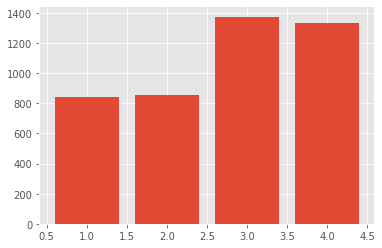

In [5]:
plt.bar(df_employee_survey.EnvironmentSatisfaction.value_counts().index, df_employee_survey.EnvironmentSatisfaction.value_counts().values)
plt.show()
# Aproximadamente el 40% de los empleados tienen una baja-media percepción del ambiente de trabajo

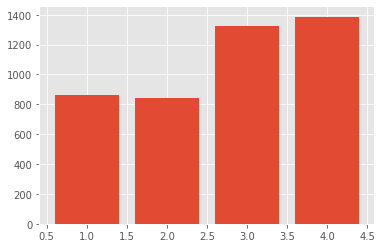

In [185]:
plt.bar(df_employee_survey.JobSatisfaction.value_counts().index, df_employee_survey.JobSatisfaction.value_counts().values)
plt.show()
# Aproximadamente el 40% de los empleados tienen una baja-media percepción con el empleo

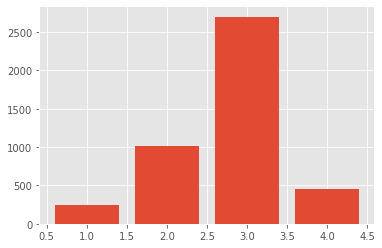

In [7]:
plt.bar(df_employee_survey.WorkLifeBalance.value_counts().index, df_employee_survey.WorkLifeBalance.value_counts().values)
plt.show()
# Aproximadamente el 30% de los empleados tienen un balance de vida-trabajo medio bueno

##***2. Manager survey***

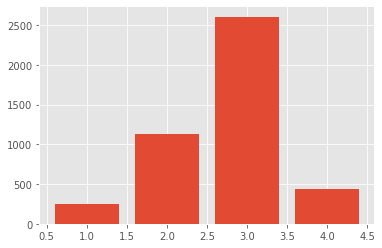

In [8]:
plt.bar(df_manager_survey.JobInvolvement.value_counts().index, df_manager_survey.JobInvolvement.value_counts().values)
plt.show()
# Aproximadamente el 30% de los empleados tienen una baja-media participación

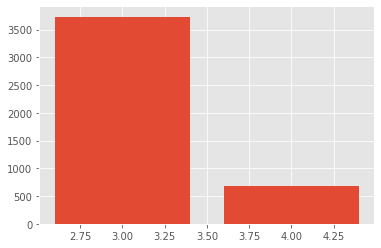

In [9]:
plt.bar(df_manager_survey.PerformanceRating.value_counts().index, df_manager_survey.PerformanceRating.value_counts().values)
plt.show()
# La mayoría de empleados tienen buen rendimiento

##***3. Retirement***

In [105]:
df_retirement.columns

Index(['EmployeeID', 'Attrition', 'retirementDate', 'retirementType',
       'resignationReason'],
      dtype='object')

In [106]:
df_retirement['month'] = df_retirement.retirementDate.dt.month

In [108]:
df = df_retirement.groupby(['month', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.bar(df, x='month', y='quantity', color='resignationReason', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [109]:
df = pd.merge(df_general[['EmployeeID', 'Department']], df_retirement, on = 'EmployeeID', how = 'right')

In [110]:
df = df.groupby(['Department', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})

In [111]:
fig = px.sunburst(df, path=['resignationReason', 'Department'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [112]:
fig = px.sunburst(df, path=['Department', 'resignationReason'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [113]:
df = pd.merge(df_general[['EmployeeID', 'MaritalStatus']], df_retirement, on = 'EmployeeID', how = 'right')

In [114]:
df = df.groupby(['MaritalStatus', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})

In [115]:
fig = px.sunburst(df, path=['resignationReason', 'MaritalStatus'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

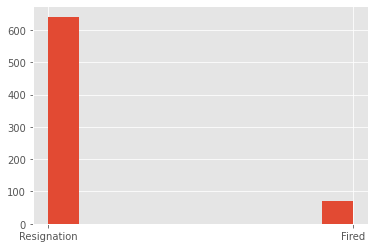

In [116]:
df_retirement.retirementType.hist()
plt.show()

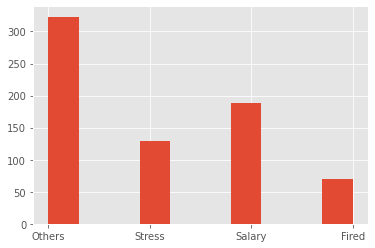

In [117]:
df_retirement.resignationReason.hist()
plt.show()

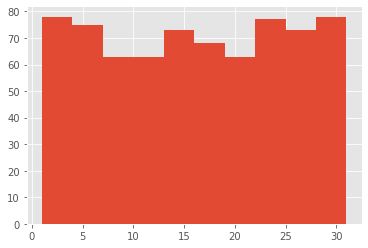

In [118]:
df_retirement.retirementDate.dt.day.hist()
plt.show()

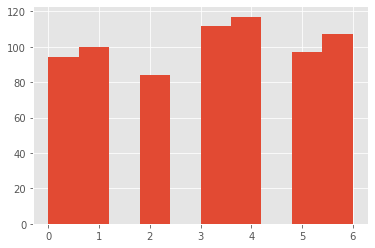

In [119]:
df_retirement.retirementDate.dt.day_of_week.hist()
plt.show()

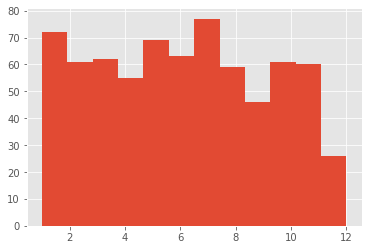

In [120]:
df_retirement.retirementDate.dt.month.hist(bins=12)
plt.show()

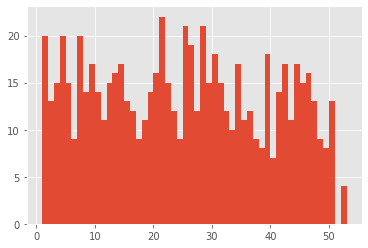

In [121]:
df_retirement.retirementDate.dt.isocalendar().week.hist(bins=52)
plt.show()

## ***4. General***

In [122]:
df_general.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

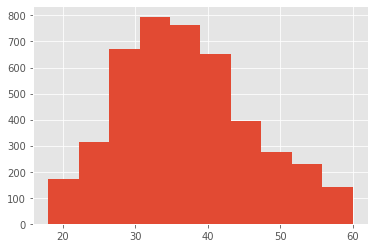

In [123]:
df_general.Age.hist()
plt.show()

In [124]:
df = df_general.groupby(['Department'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='Department', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [125]:
df = df_general.groupby(['BusinessTravel'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='BusinessTravel', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [126]:
df = df_general.groupby(['EducationField'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='EducationField', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [127]:
df = df_general.groupby(['Gender'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='Gender', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

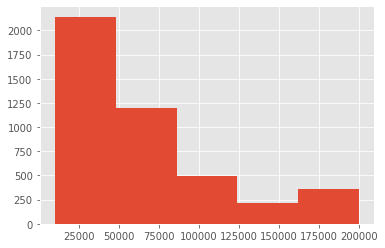

In [128]:
df_general.MonthlyIncome.hist(bins=5)
plt.show()

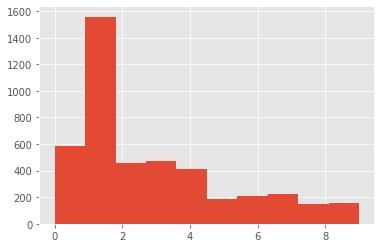

In [129]:
df_general.NumCompaniesWorked.hist()
plt.show()

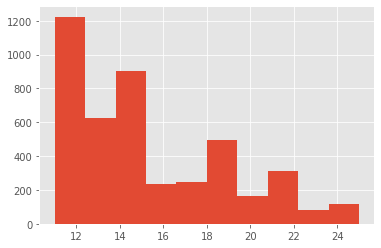

In [130]:
df_general.PercentSalaryHike.hist()
plt.show()

In [163]:
df = pd.merge(df_general, df_retirement[['EmployeeID', 'Attrition']], on = 'EmployeeID', how = 'left')

In [164]:
df.Attrition.fillna('No', inplace=True)

In [165]:
df = (df.groupby(['PercentSalaryHike', 'Attrition'])[['EmployeeID']].count()/df.groupby(['PercentSalaryHike'])[['EmployeeID']].count()).reset_index().rename(columns={'EmployeeID':'percentage'})

In [166]:
fig = px.bar(df, x='PercentSalaryHike', y='percentage', color='Attrition', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [215]:
df_employee_survey.EmployeeID.str.extract(pat=r'([*.])')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4405,NaN
4406,NaN
4407,NaN
4408,NaN


In [203]:
df = pd.merge(df_general, df_employee_survey[['EmployeeID', 'JobSatisfaction']], on = 'EmployeeID', how = 'left')

In [204]:
df_employee_survey[['EmployeeID', 'JobSatisfaction']].

,EmployeeID,JobSatisfaction
0,1,4.0
1,2,2.0
2,3,2.0
3,4,4.0
4,5,1.0
...,...,...
4405,4,1.0
4406,4,4.0
4407,4,3.0
4408,4,1.0


In [184]:
df.JobSatisfaction.unique()

array([nan])